<a href="https://colab.research.google.com/github/poorjoke2201/ml_lab/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

Training set shape: (60000, 28, 28) (60000,)
Test set shape: (10000, 28, 28) (10000,)


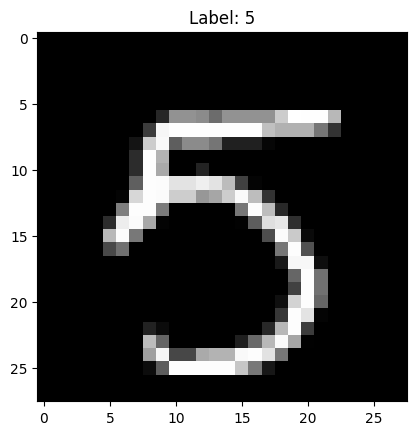

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

# Visualize a random image
idx = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[idx], cmap='gray')
plt.title(f"Label: {y_train[idx]}")
plt.show()

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
train_filter= np.where((y_train==0) | (y_train==1))
test_filter= np.where((y_test==0) | (y_test==1))

x_train, y_train= x_train[train_filter], y_train[train_filter]
x_test, y_test= x_test[test_filter], y_test[test_filter]

print(f"Training Sample: {x_train.shape}")
print(f"Testing Sample: {x_test.shape}")

Training Sample: (12665, 28, 28)
Testing Sample: (2115, 28, 28)


In [10]:
# Normalize the Data
x_train= x_train/255
x_test= x_test/255

In [11]:
# Flatten the Data
x_train= x_train.reshape(x_train.shape[0], -1)
x_test= x_test.reshape(x_test.shape[0], -1)


In [12]:
# Create and Fit the Model
model= LogisticRegression(max_iter=200)
model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [13]:
# Predict
y_pred= model.predict(x_test)



In [14]:
# Accuracy
accuracy= accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9995271867612293


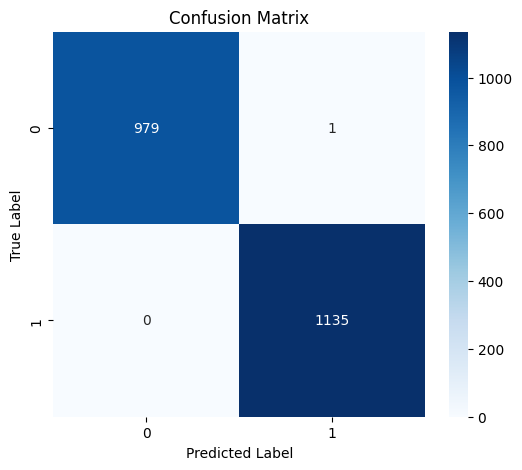

In [15]:
# Confusion Matrix
cm= confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# Misclassified Samples
misclassified_idx= np.where(y_pred != y_test)[0]
print(f"Total misclassified: {len(misclassified_idx)}")

Total misclassified: 1


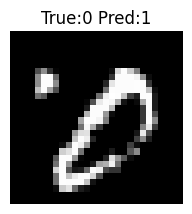

In [17]:
# Plot the misclassified digits
plt.figure(figsize=(12, 6))
for i, idx in enumerate(misclassified_idx):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True:{y_test[idx]} Pred:{y_pred[idx]}")
    plt.axis("off")
plt.tight_layout()
plt.show()